In [1]:
# !pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS= 20

In [4]:
 dataset = tf.keras.preprocessing.image_dataset_from_directory(
     "Potato-classes",
     shuffle=True,
     image_size = (IMAGE_SIZE,IMAGE_SIZE),
     batch_size = BATCH_SIZE
 )


Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 0 0 0 1 2 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])


tf.Tensor(
[[[169. 165. 179.]
  [164. 160. 174.]
  [163. 159. 173.]
  ...
  [151. 145. 157.]
  [140. 134. 146.]
  [175. 169. 181.]]

 [[167. 163. 177.]
  [157. 153. 167.]
  [150. 146. 160.]
  ...
  [153. 147. 159.]
  [144. 138. 150.]
  [161. 155. 167.]]

 [[141. 137. 151.]
  [143. 139. 153.]
  [154. 150. 164.]
  ...
  [165. 159. 171.]
  [161. 155. 167.]
  [155. 149. 161.]]

 ...

 [[103.  91. 103.]
  [100.  88. 100.]
  [100.  88. 100.]
  ...
  [130. 118. 128.]
  [127. 115. 125.]
  [121. 109. 119.]]

 [[108.  96. 108.]
  [105.  93. 105.]
  [103.  91. 103.]
  ...
  [128. 116. 126.]
  [129. 117. 127.]
  [126. 114. 124.]]

 [[100.  88. 100.]
  [ 98.  86.  98.]
  [ 97.  85.  97.]
  ...
  [114. 102. 112.]
  [120. 108. 118.]
  [122. 110. 120.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
#to convert tensor to numpy
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[128. 117. 131.]
  [130. 119. 133.]
  [129. 118. 132.]
  ...
  [109.  99. 110.]
  [114. 104. 115.]
  [123. 113. 124.]]

 [[122. 111. 125.]
  [126. 115. 129.]
  [127. 116. 130.]
  ...
  [112. 102. 113.]
  [117. 107. 118.]
  [125. 115. 126.]]

 [[119. 108. 122.]
  [124. 113. 127.]
  [127. 116. 130.]
  ...
  [112. 102. 113.]
  [115. 105. 116.]
  [122. 112. 123.]]

 ...

 [[181. 171. 179.]
  [177. 167. 175.]
  [171. 161. 169.]
  ...
  [ 84.  62.  65.]
  [ 86.  64.  67.]
  [ 85.  63.  66.]]

 [[175. 165. 173.]
  [172. 162. 170.]
  [170. 160. 168.]
  ...
  [ 80.  58.  61.]
  [ 85.  63.  66.]
  [ 85.  63.  66.]]

 [[169. 159. 167.]
  [168. 158. 166.]
  [170. 160. 168.]
  ...
  [ 78.  56.  59.]
  [ 84.  62.  65.]
  [ 85.  63.  66.]]]


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [11]:
len(dataset)

68

### Visualization

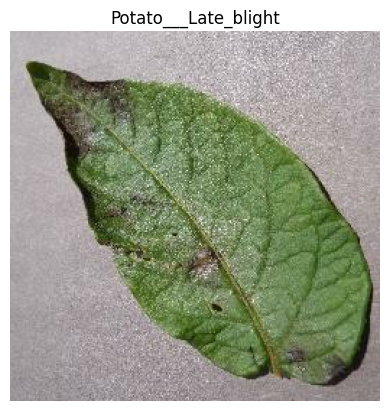

In [12]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    

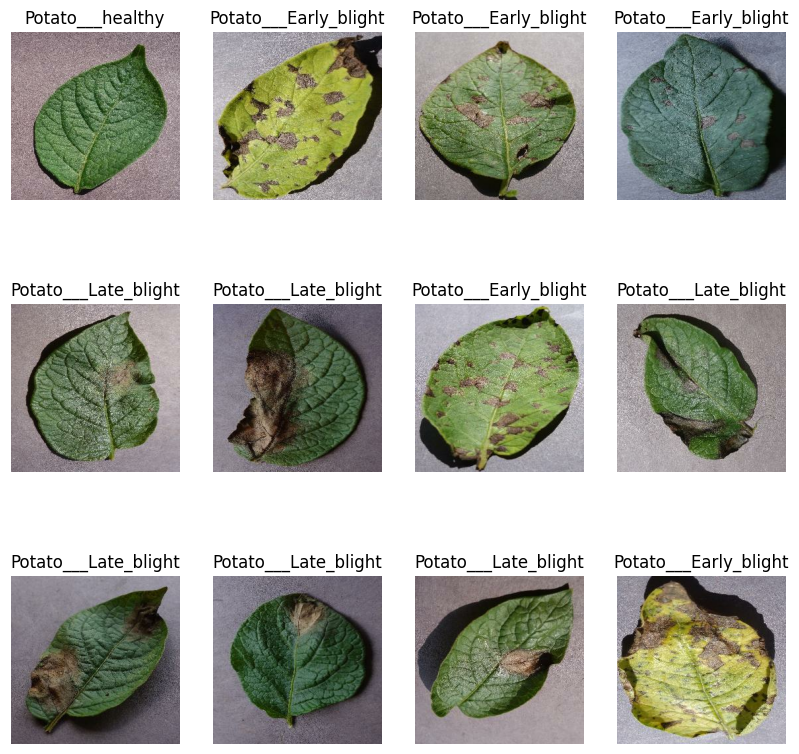

In [13]:
# to display multiple images

plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [14]:
# Split dataset into training/test split
# 80% ==> training
# 20% ==> 10% validation, 10% test
# we'll use the 10% to test the accuracy of our model


In [15]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [16]:
train_ds =dataset.take(54)
len(train_ds)

54

In [17]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [18]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [20]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [21]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, 
                              shuffle=True, shuffle_size=10000):
   
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)


    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

54

In [24]:
len(val_ds)

6

In [25]:
len(test_ds)

8

In [26]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
# preprocessing by scaling the image 
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
    
])

In [28]:
# data augmentation 
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    
])

### Model Development

In [29]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3, 3) ,activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3, 3) ,activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3, 3) ,activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3, 3) ,activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3, 3) ,activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),

])
model.build(input_shape=input_shape)

C:\Users\Uyama\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
    
)

In [33]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.4846 - loss: 0.9365 - val_accuracy: 0.5260 - val_loss: 0.8495
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6147 - loss: 0.7417 - val_accuracy: 0.6302 - val_loss: 0.7813
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.7183 - loss: 0.6177 - val_accuracy: 0.7604 - val_loss: 0.5150
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.7639 - loss: 0.4844 - val_accuracy: 0.8125 - val_loss: 0.4025
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8616 - loss: 0.3565 - val_accuracy: 0.8021 - val_loss: 0.5153
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8833 - loss: 0.3027 - val_accuracy: 0.8958 - val_loss: 0.2688
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9014 - loss: 0.2363 - val_accuracy: 0.9375 - val_loss: 0.1633
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9257 - loss: 0.1853 - val_accuracy: 0.9427 - val_l

In [34]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.9340 - loss: 0.2307


In [35]:
scores

[0.17979800701141357, 0.9453125]

In [36]:
history

In [37]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [39]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [40]:
len(history.history["accuracy"])

20

In [45]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

In [51]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

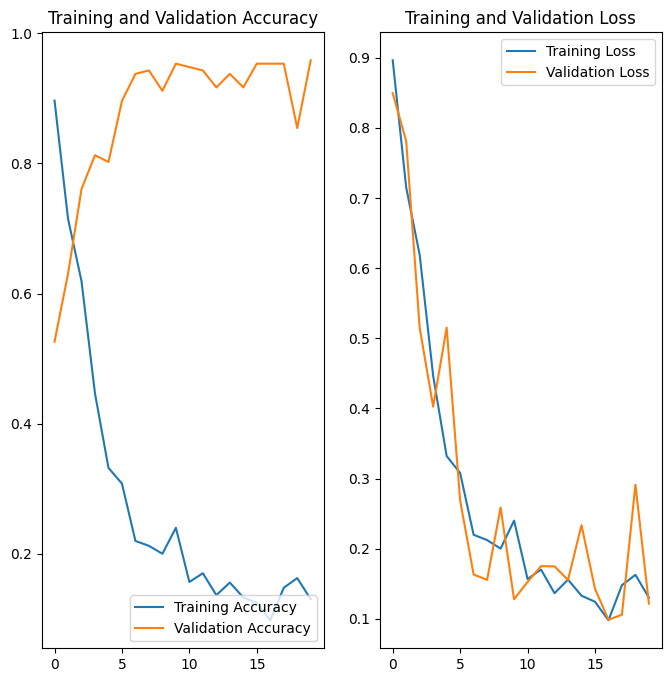

In [52]:
# Next we plot training vs validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [66]:
for images_batch, labels_batch in test_ds.take(1):
    # print (images_batch[0]) #tensor
    # plt.imshow (images_batch[0].numpy().astype("uint8"))
     print (images_batch[0].numpy().astype("uint8")) #as a three dimensional array

[[[186 190 201]
  [186 190 201]
  [193 197 208]
  ...
  [157 155 168]
  [159 157 170]
  [148 146 159]]

 [[188 192 203]
  [187 191 202]
  [190 194 205]
  ...
  [152 150 163]
  [154 152 165]
  [149 147 160]]

 [[193 197 208]
  [191 195 206]
  [191 195 206]
  ...
  [147 145 158]
  [149 147 160]
  [153 151 164]]

 ...

 [[149 151 164]
  [148 150 163]
  [149 151 164]
  ...
  [135 133 144]
  [127 125 136]
  [119 117 128]]

 [[149 151 164]
  [148 150 163]
  [147 149 162]
  ...
  [136 134 145]
  [140 138 149]
  [133 131 142]]

 [[149 151 164]
  [147 149 162]
  [147 149 162]
  ...
  [130 128 139]
  [121 119 130]
  [124 122 133]]]


In [79]:
import numpy as np

first image to predict
first image's actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
predicted label: Potato___Late_blight


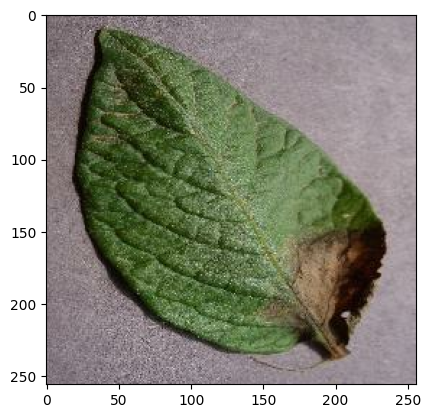

In [84]:
for images_batch, labels_batch in test_ds.take(1):

    first_image =  images_batch[1].numpy().astype("uint8")
    first_label = labels_batch[1]

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:", class_names[first_label])

    # batch_prediction = model.predict(images_batch)
    # print(batch_prediction[0])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [88]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[1].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


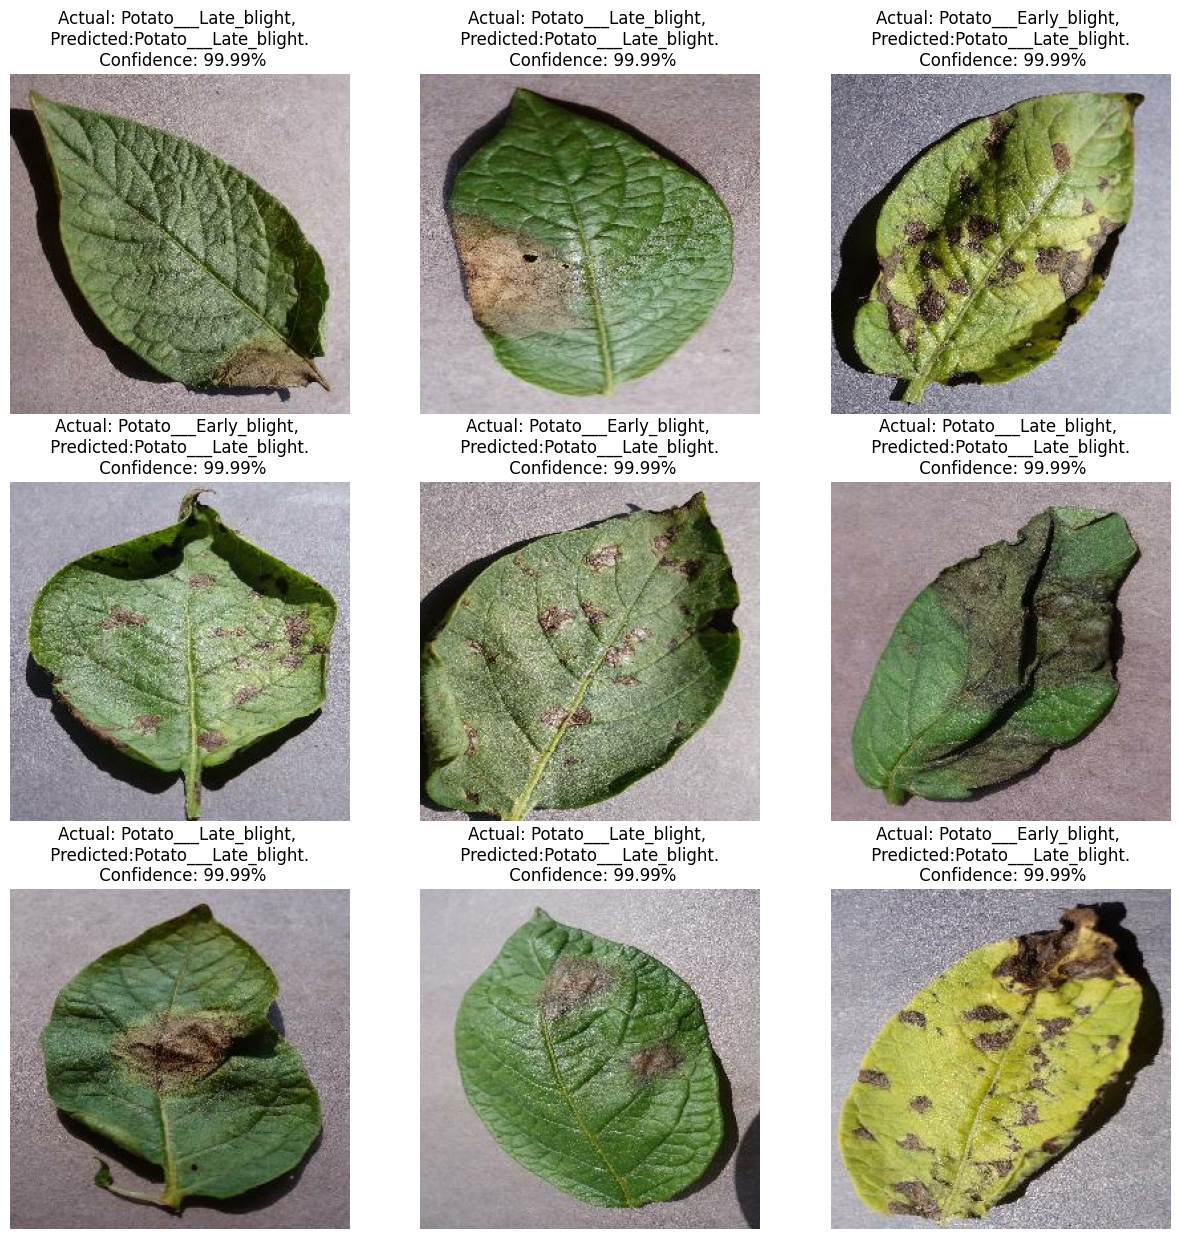

In [102]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted:{predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off") #exclude labels


In [123]:
# save it as a keras file


from tensorflow.keras.models import load_model

model.save('potato-model.keras')